The algorithm works like this:

![](https://mermaid.ink/svg/pako:eNqFVulu2zAMfhXCv1K03QPkx4b0WFFg64K2G7DZRaHYTCzElgxZTtfr3UcdPuQ4nYDWEimSH0_lNUplhtE82ihW5XB_kQigVTcrR_i5WMKi2EjFdV46nll3mik9m9nP0VFPvxZcc1bwF_wV93soeK1BrqFCpRu1YppLUcPuoRfsDF6hQMU0AodG8B2qmhWhXC9kLWp7PfZf0LmSzSaHusKUrzlmIJpyhYr0EYAMa66INq0aeMk2GAILvRo6FUhqFLVUsHvkwGpgXhU8UdjgBZXEeqSzc_iykmk-csqsr1JdsjSP6QtIGxCTWDnZzsltxbjgYgMZ06xG_bCvsLM4DpXTtC9g1hXqa8OOaWMNCfyrvXPG9P_NjsriHstqGEWnymcrDV3cPWq6_UEQ23WeY7qN7X_gayippAvgNaylLCjbq2cLPdQNx17_AZ1duH5Umpf8xYktlVwVWE6LmLWk8uKpjpPoO9uih1I5olFgnaF22nBB1cdE1sIinC4WM_c5tsXUgjxKoofDRs8Usm18i1qZgtdSUq1TRX75QOSbrOv4nBVpU7haoC4lksNnToMGkqq0SLkwTYNwdn75ERiWbislK7YxfRmcQIrekpawoaJK6UDtSSfDychobeK0ko3ImHr-wJDN94UXOPP3-yqYVAdP1J7K9BNmB1SjyKYZiyyL6Y_Qp-PB4SuVnDgwWSiXB8zdYoVM97BZUYBvrLbHc7ZDWCESwbVu1vbuhM5J-F2iByk3zWFa186C0XB2g4xSnraw2skZSPFDsdwDcUcuxIuqwr7ge0MUNvtCjOeujcnNcjj8-zi1gFhJqbWvy4H3giZ_Tkm38dtHGyDtd9RLjRKzmfvCrn3k7HW3tY8fnJ5-Ho43xxoQ3AWXNs_04zeUHAtatn8DHM8fLKMdy47TnsZgzKzdA2SI9qKNpGO7oBLx7TfWb6bQx_Qb-daONsfyB6vJzBJHNTtLCtre8cJJ0CEYN_DA8phlhaYgTl80mO1k9PbNtucE3njep06_60rHND1vxIY0t-9D1rXVmO2Mhfnqe7B3yDTIJNeIB3VgbvbhC9tjEJOQ0SUxKMVDF30ITOknIjqJSlQl4xn9THw1gklEs7XEJJrTluK9TaJEvNM91mh59yzSaK5VgydRU9HvArzgjF7SMpqvWVETtWLij5Tt-f0f7X5Wpw)

In [1]:
# %load_ext autoreload
# %autoreload 2

import os

os.chdir("..")

import torch
import wandb
import torchvision
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from src.utils.download import download_models
from src.utils.uap_helper import generate_adversarial_images_from_model_dataset, get_datamodule
from src.utils.metrics import metrics, Metrics
from src.data.mri import MRIDataModule
from src.data.covidx import COVIDXDataModule
from src.utils.evaluation import WeightsandBiasEval
from src.models.imageclassifier import ImageClassifier

In [2]:
ENTITY = "24FS_I4DS27"
PROJECT = "baselines"
NUM_WORKERS = 8

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((224, 224), antialias=True),
    ]
)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

In [3]:
# Download models if not present
models = download_models(ENTITY, PROJECT)

In [4]:
for model in tqdm(models, desc="Model", position=0, total=len(models)):
    modelname, dataset = model.split("-")
    print(f"\n---\nModel: {modelname} - Dataset: {dataset}")

    perturbations = generate_adversarial_images_from_model_dataset(
        modelname,
        dataset,
        transform,
        num_universal_pertubation_images=1,
        num_pertubation_images=100,
        desired_fooling_rate=0.5,
        norm_p=2,
        norm_alpha=0.001,
        max_iter_image=20,
        seed=42,
        eps=1e-6,
        num_workers=NUM_WORKERS,
        device=device,
        verbose=True,
    )

    break

Model:   0%|          | 0/22 [00:00<?, ?it/s]


---
Model: resnet152 - Dataset: covidx_data


Universal Pertubation:   0%|          | 0/1 [00:00<?, ?it/s]

Starting epoch 1...


Image:   0%|          | 0/100 [00:00<?, ?it/s]

Image 0...
Loss: 1.4461809396743774, Norm: 0.0, InvBCE: 1.4461809396743774
Image fooled! Adding perturbation...
Image 1...
Loss: 2.5236973762512207, Norm: 0.0, InvBCE: 2.4885671138763428
Loss: 2.111022710800171, Norm: 0.03860245272517204, InvBCE: 2.0643389225006104
Loss: 1.779130220413208, Norm: 0.06876450031995773, InvBCE: 1.7075294256210327
Loss: 1.5171886682510376, Norm: 0.0967063456773758, InvBCE: 1.4189504384994507
Loss: 1.3119348287582397, Norm: 0.12274374067783356, InvBCE: 1.187938928604126
Loss: 1.169588565826416, Norm: 0.1467263549566269, InvBCE: 1.0216153860092163
Image fooled! Adding perturbation...
Image 2...
Loss: 29.81244659423828, Norm: 0.0, InvBCE: 29.642576217651367
Loss: 16.291479110717773, Norm: 0.0387796126306057, InvBCE: 16.116079330444336
Loss: 8.845892906188965, Norm: 0.07361578196287155, InvBCE: 8.659012794494629
Loss: 5.0880126953125, Norm: 0.1055026650428772, InvBCE: 4.886092662811279
Loss: 3.186232566833496, Norm: 0.13435958325862885, InvBCE: 2.96770453453063

Image:   0%|          | 0/100 [00:00<?, ?it/s]

Fooling rate: 0.46
Starting epoch 2...


Image:   0%|          | 0/100 [00:00<?, ?it/s]

Image 0...
Loss: 2.2129955291748047, Norm: 0.0, InvBCE: 1.5630253553390503
Loss: 2.192068576812744, Norm: 0.037300385534763336, InvBCE: 1.5620113611221313
Loss: 2.1724534034729004, Norm: 0.07070805877447128, InvBCE: 1.560850739479065
Loss: 2.153809070587158, Norm: 0.10149211436510086, InvBCE: 1.5593680143356323
Loss: 2.136152744293213, Norm: 0.1296389102935791, InvBCE: 1.5577632188796997
Loss: 2.1191134452819824, Norm: 0.15537583827972412, InvBCE: 1.55581533908844
Loss: 2.10245418548584, Norm: 0.17899318039417267, InvBCE: 1.553402304649353
Loss: 2.0862903594970703, Norm: 0.20076902210712433, InvBCE: 1.5507313013076782
Loss: 2.070209264755249, Norm: 0.22095316648483276, InvBCE: 1.547461748123169
Loss: 2.0540013313293457, Norm: 0.2398114800453186, InvBCE: 1.5434110164642334
Loss: 2.0376076698303223, Norm: 0.25758278369903564, InvBCE: 1.5385245084762573
Loss: 2.0206685066223145, Norm: 0.2744852602481842, InvBCE: 1.5324466228485107
Loss: 2.0036301612854004, Norm: 0.2907136380672455, InvBCE

Image:   0%|          | 0/100 [00:00<?, ?it/s]

Fooling rate: 0.56


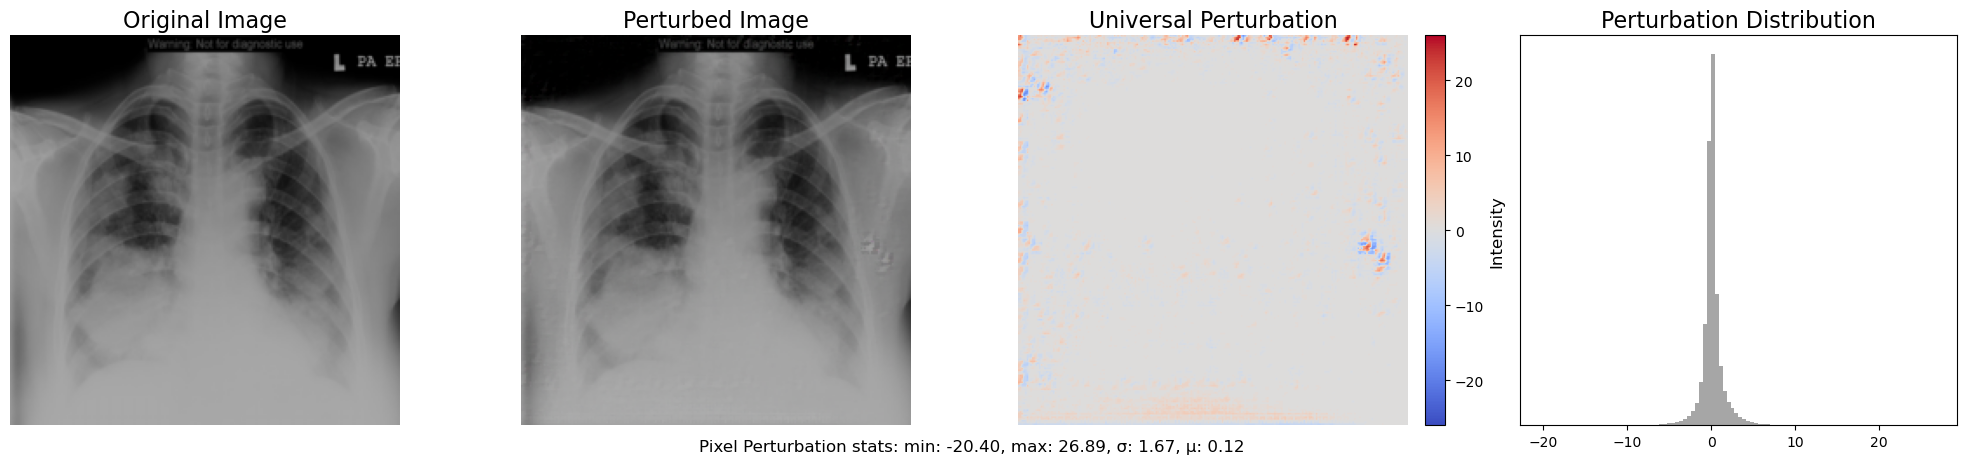

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

v = perturbations[0].detach()
get_datamodule(dataset, seed=42).setup()
image, _ = next(iter(get_datamodule(dataset).train_dataloader()))

# Prepare subplots in one row
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figsize to ensure each subplot is visually proportional

# Original Image
axs[0].imshow(image.cpu().squeeze().permute(1, 2, 0).numpy().astype(int))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")  # Hide axes for cleaner look

# Perturbed Image
x_adv = image + v.cpu()
x_adv = torch.clamp(x_adv, 0, 255)
axs[1].imshow(x_adv.cpu().squeeze().permute(1, 2, 0).numpy().astype(int))
axs[1].set_title("Perturbed Image", fontsize=16)
axs[1].axis("off")

# Perturbation Visualization
perturbation_visual = v.mean(dim=0).cpu().squeeze().numpy().astype(int)
vmax = abs(perturbation_visual).max()
im = axs[2].imshow(perturbation_visual, cmap="coolwarm", vmin=-vmax, vmax=vmax)
axs[2].set_title("Universal Perturbation", fontsize=16)
axs[2].axis("off")
cbar = plt.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
cbar.set_label("Intensity", fontsize=12)

# Statistical Distribution of Perturbation
axs[3].hist(v.cpu().flatten(), bins=100, color="grey", alpha=0.7)
axs[3].set_aspect("auto", adjustable="box")
axs[3].set_title("Perturbation Distribution", fontsize=16)
axs[3].set_yticks([])
axs[3].axis("on")

plt.suptitle(
    f"Pixel Perturbation stats: min: {v.min().item():.2f}, max: {v.max().item():.2f}, σ: {v.std().item():.2f}, μ: {v.mean().item():.2f}",
    fontsize=12,
    y=0.05,  # Adjust for top layout
)

plt.tight_layout()
plt.show()